<h1>PROJECT PART 1 </h1>


<h3>#1: Convert the RGB to HSV code so it produces values in OpenCV's specified ranges and array structure. Your function should accept a 3D array and return HSV values in OpenCV's ranges. </h3>

In [59]:
import cv2 
import numpy as np 
from numpy import interp 

# defining a function. Accepts a 3d array with RGB values. RGB values are in the range (0, 255).
def rgb2hsv(rgb):
    rgb = rgb / 255
    for i in range(0, len(rgb)):
        for j in range(0, len(rgb[i])):
            # initialize your hsv values. Make sure they are floating point numbers. 
            h = 0.0
            s = 0.0 
            v = 0.0 
            
            # beginning to implement formula. 
            v = np.max(rgb[i][j])
            diff = np.max(rgb[i][j]) - np.min(rgb[i][j])
            
            if(v > 0.0):
                s = diff / v
            # otherwise s stays at 0 
            
            # follow conditionals of formula. If conditions are not met 
            if(rgb[i][j][0] == rgb[i][j][1] and rgb[i][j][1]== rgb[i][j][2]):
                h = 0.0
            elif(v == rgb[i][j][0]):
                h = 60*(rgb[i][j][1]- rgb[i][j][2]) / diff
            elif(v == rgb[i][j][1]):
                h = 120 + 60*(rgb[i][j][2] - rgb[i][j][0]) / diff
            elif(v == rgb[i][j][2]):
                h = 240 + 60*(rgb[i][j][2] - rgb[i][j][1]) / diff
                
            # convert them to OpenCV's range 
            h = round(h/2)
            s = round(np.interp(s, [0, 1], [0, 255]))
            v = round(np.interp(v, [0, 1], [0,255]))
            
            # overwrite values in-place
            rgb[i][j][0] = h
            rgb[i][j][1] = s 
            rgb[i][j][2] = v
            
        
    return rgb

In [60]:
# TESTING: 
rgb = np.uint8([[[200, 74, 55]]])
hsv = rgb2hsv(rgb)
print("Original RGB value: ", rgb)
print("Converted to HSV: ", hsv)

Original RGB value:  [[[200  74  55]]]
Converted to HSV:  [[[  4. 185. 200.]]]


 <h3>#2: Write the Python code for the conversion of HSV color space to RGB. Include comments to describe each step in your code.</h3>

In [61]:
# HSV to RGB code 
def hsv2rgb(hsv):
    for i in range(0, len(hsv)):
        for j in range(0, len(hsv[i])):
            h, s, v = hsv[i][j]
            h*=2
            s /= 255
            v /= 255
            
            c = v * s 
            x = c * (1 -abs((h/60)%2 -1))
            m = v - c
                
            r = 0.0
            g = 0.0 
            b = 0.0
                    
            rp = 0.0
            gp = 0.0
            bp = 0.0
                
                    
            if(h >= 0 and h < 60):
                rp = c 
                gp = x 
                bp = 0
            elif(h>=60 and h < 120):
                rp = x
                gp = c 
                bp = 0   
            elif(h>=120 and h < 180):
                rp = 0
                gp = c 
                bp = x   
            elif(h>=180 and h < 240):
                rp = 0
                gp = x 
                bp = c   
            elif(h>=240 and h < 300):
                rp = x
                gp = 0 
                bp = c     
            elif(h>=300 and h < 360):
                rp = c
                gp = 0 
                bp = x
                    
            r = (rp + m)*255
            g = (gp + m)*255
            b = (bp + m)*255 
            
            hsv[i][j][0] = r
            hsv[i][j][1] = g 
            hsv[i][j][2] = b 
                        
    return np.uint8(hsv) 
                

In [62]:
hsv = np.uint8([[[4, 185, 200]]]) # HSV value 
print("Original HSV value: ", hsv)
rgb = hsv2rgb(hsv) # Converted RGB value 
print("Converted to RGB: ", rgb)

Original HSV value:  [[[  4 185 200]]]
Converted to RGB:  [[[200  74  54]]]


<h1>PROJECT PART 2 </h1>

<h4>Import image into Jupyter Notebook.</h4>

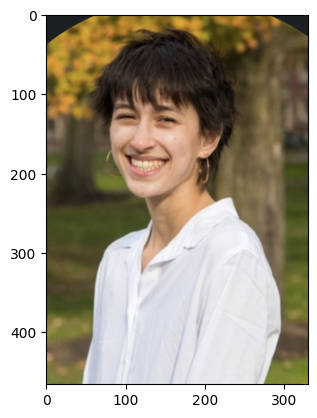

In [63]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# reading image in and displaying it 
img = cv2.imread("./self.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<h4>Analyze the image. Create a histogram of the whole image. </h4>

In [64]:
# Printing the shape of the image 
print("Img shape: ", img.shape)

Img shape:  (466, 330, 3)


In [65]:
# Code to plot image + its RGB histogram. Input the figure size, the title of the image, the position of the image, the title 
# of the histogram, position of the histogram, and then the image. 
def plotHistogram(figsize, titleimg, pos1, titlehist, pos2, img, leg1, leg2, leg3, legpos, mask):
    plt.figure(figsize=(figsize[0],figsize[1]))
    plt.subplot(1, 2, pos1)
    plt.title(titleimg)
    plt.imshow(img)
    
    plt.subplot(1, 2, pos2)
    plt.title(titlehist)

    hist = cv2.calcHist([img],[0],mask,[256],[0,255])
    plt.plot(hist, color='red')
    plt.xlim([0,255])

    # green channel.
    hist = cv2.calcHist([img],[1],mask,[256],[0,255])
    plt.plot(hist, color='green')
    plt.xlim([0,255])

    # blue channel.
    hist = cv2.calcHist([img],[2],mask,[256],[0,255])
    plt.plot(hist, color='blue')

    plt.xlim([0,255])

    plt.legend((leg1, leg2, leg3), loc = legpos)
    plt.tight_layout()
    plt.show()

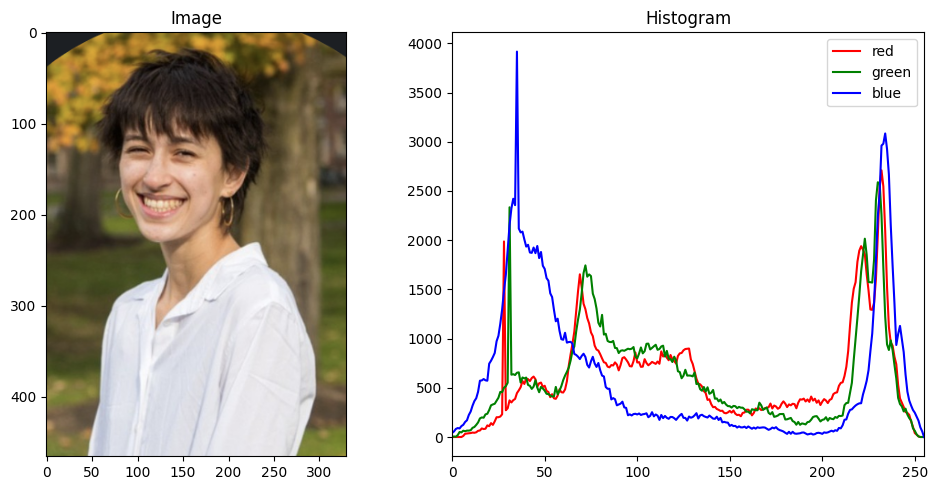

In [66]:
plotHistogram([10, 5], "Image", 1, "Histogram", 2, img, "red", "green", "blue", "upper right", None)

<h4>Modify your image with brightness and contrast so it fills the complete tonal range.</h4>

In [67]:
# Code for gamma correction 
def gamma_correction(img, gamma):
    # normalize image to [0, 1] + apply gamma correction + scale back to [0, 255]
    corrected = 255.0 * (img / 255.0) ** gamma
    return np.uint8(corrected)

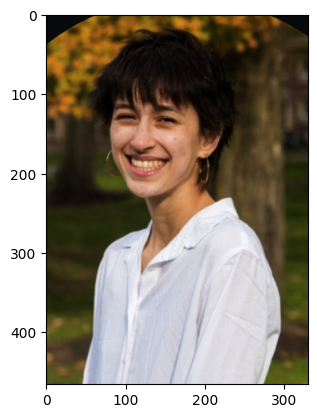

In [68]:
gamma = 1.5 # Gamma value >1 for higher contrast 
corrected_image = gamma_correction(img, gamma) # Displaying corrected image 
plt.imshow(corrected_image)

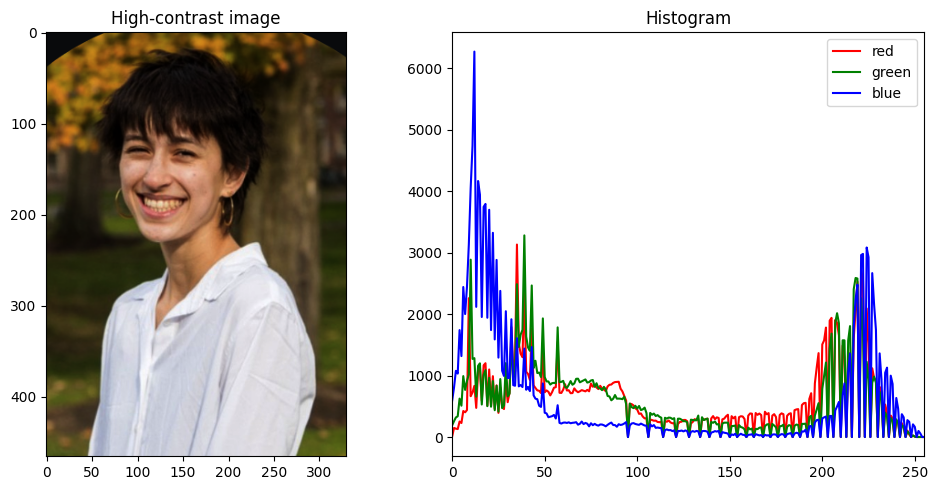

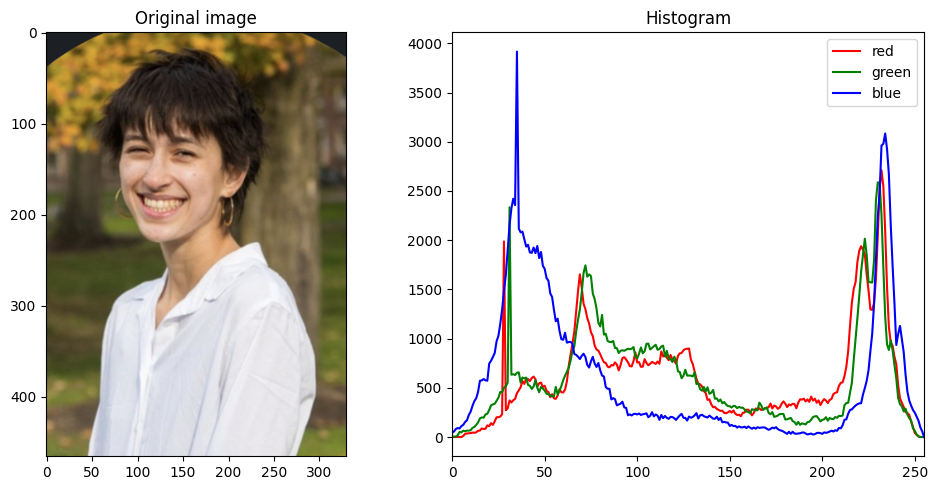

In [69]:
# Plotting the image, high-contrast image, and their corresponding histograms. 
plotHistogram([10, 5], "High-contrast image", 1, "Histogram", 2, corrected_image, "red", "green", "blue", "upper right", None) 
plotHistogram([10, 5], "Original image", 1, "Histogram", 2, img, "red", "green", "blue", "upper right", None)

<h4></h4>

<h4>Create a mask of your face. </h4>

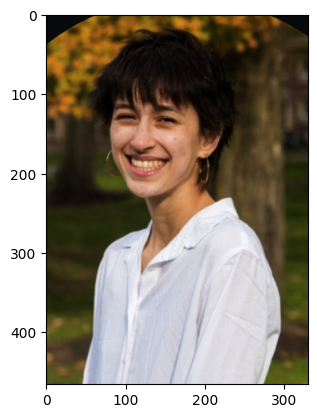

In [70]:
img = corrected_image # Setting corrected image back equal to img 
plt.imshow(img)

<h4> Analyze specific portions of the image by drawing a rectangle first: </h4>

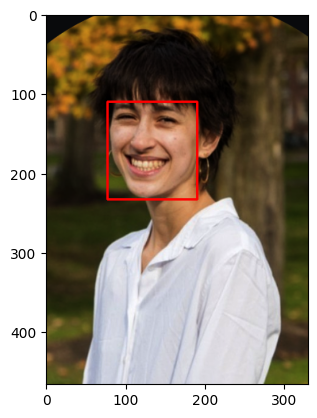

In [71]:
tl = (77, 110) # top left 
br = (190, 233) # bottom right 
rc = (255, 0, 0) # rectangle color 
thickness = 2 # thickness 
rect = cv2.rectangle(corrected_image, tl, br, rc, thickness)
plt.imshow(rect)


<h4>Creating a mask</h4>

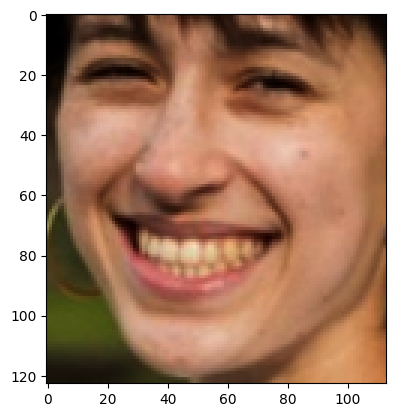

In [72]:
# Reload in image 
img = cv2.imread("./self.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img = gamma_correction(img, gamma) # Displaying corrected image 
masked = img[110:233, 77:190] # Creating masked image
plt.imshow(masked)

<h4> Creating a histogram of the HSV values: </h4>

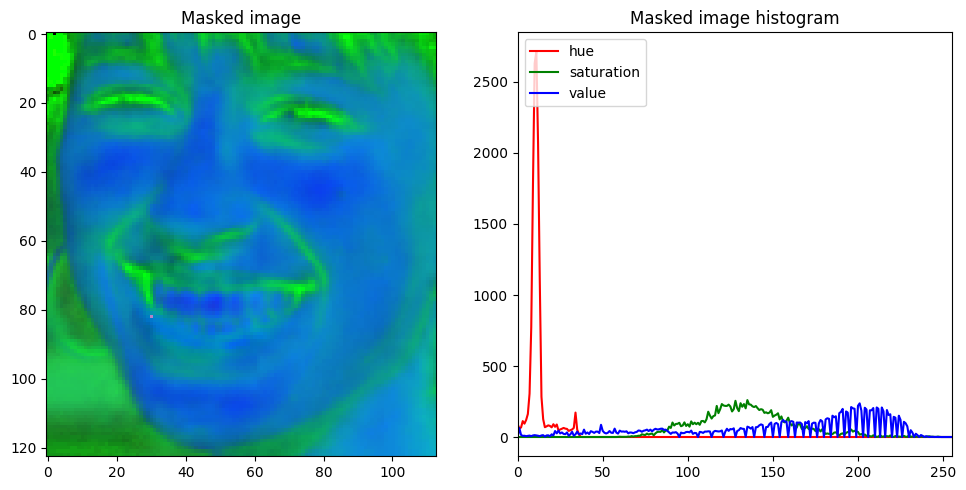

In [73]:
# Converting RGB values to HSV values 
masked = cv2.cvtColor(masked, cv2.COLOR_RGB2HSV)
plotHistogram([10, 5], "Masked image", 1, "Masked image histogram", 2, masked, "hue", "saturation", "value", "upper left", None)


<h4>Adding mask to the image</h4>

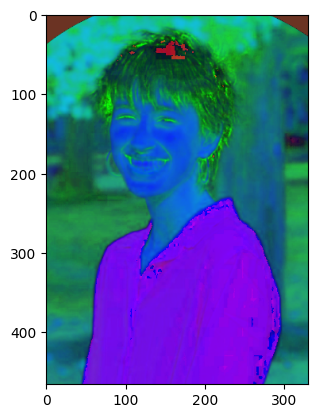

In [74]:
img = cv2.imread("self.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img)

<h4>Analyze the histogram for skin tone ranges. Use HSV to create a mask of skin tone ranges.</h4>

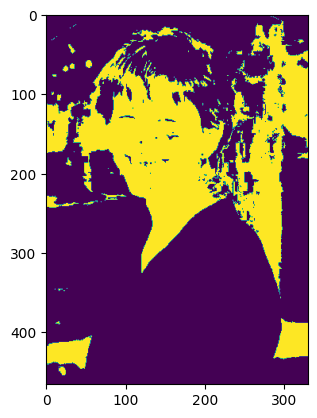

In [75]:
# This will reply on estimation. 
lb = np.uint8([0,40,50]) 
ub = np.uint8([20,170,240]) 
skin_tone_mask = cv2.inRange(img, lb, ub)
plt.imshow(skin_tone_mask)

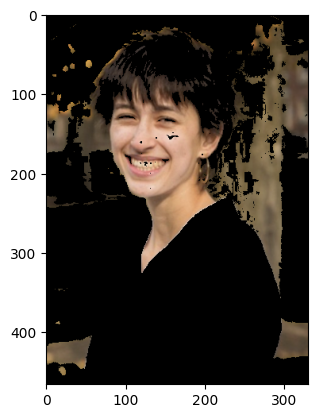

In [76]:

final = cv2.bitwise_and(img, img, mask=skin_tone_mask)
final = cv2.cvtColor(final, cv2.COLOR_HSV2RGB)
plt.imshow(final)